In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

2023-08-01 18:04:16.304137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load and prepare data

In [3]:
return_sequences = False
n = 10000
time_span = 5
c = 100
time_step = 0.1
integration_time_step = 0.01
std = 0

In [10]:
# Load the observations
name = f"{n}_{time_span}_{c}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{std}"
observations = np.load(f"data_no_std/test_observations_{name}.npy")
predictions = np.load(f"data_no_std/test_predictions_{name}.npy")
print(f"observation array shape = {observations.shape}")

observation array shape = (10000, 51, 3)


In [12]:
# Scale the data
maximum = max( np.max(np.abs(observations)), np.max(np.abs(observations)))
observations_scaled = observations/maximum
predictions_scaled = predictions/maximum
print(maximum)

48.52176290761893


In [13]:
# Split into training and test data

frac = 0.9
num_samples = observations_scaled.shape[0]
cut_off = int(frac*num_samples)

train_x = observations_scaled[:cut_off,:-1, :]
test_x = observations_scaled[cut_off:,:-1, :]
if return_sequences:
    train_answer = observations_scaled[:cut_off, 1:, :]
    test_answer = observations_scaled[cut_off:, 1:, :]
    train_prediction = predictions_scaled[:cut_off, 1:, :]
    test_prediction = predictions_scaled[cut_off:, 1:, :]
else:
    train_answer = observations_scaled[:cut_off, -1, :]
    test_answer = observations_scaled[cut_off:, -1, :]
    train_prediction = predictions_scaled[:cut_off, -1, :]
    test_prediction = predictions_scaled[cut_off:, -1, :]
print(f"shape of training data = {train_x.shape}")
print(f"shape of training predictions = {train_prediction.shape}")
print(f"shape of training answers = {train_answer.shape}")

shape of training data = (9000, 50, 3)
shape of training predictions = (9000, 3)
shape of training answers = (9000, 3)


Create the architecture

In [7]:
# Create the architecture
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(None, 3), return_sequences=return_sequences))
model.add(layers.Dense(16))
model.add(layers.Dense(3))

model.summary()

model.compile(loss='mse', optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 18499 (72.26 KB)
Trainable params: 18499 (72.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train

In [19]:
history = model.fit(train_x, train_answer, epochs=20, validation_data=(test_x, test_answer), batch_size=32, verbose=2, shuffle=True)

Epoch 1/20
282/282 - 9s - loss: 1.4093e-06 - val_loss: 1.9330e-06 - 9s/epoch - 32ms/step
Epoch 2/20
282/282 - 8s - loss: 1.1874e-06 - val_loss: 1.3117e-06 - 8s/epoch - 30ms/step
Epoch 3/20
282/282 - 7s - loss: 2.3319e-06 - val_loss: 3.3254e-06 - 7s/epoch - 25ms/step
Epoch 4/20
282/282 - 7s - loss: 1.5411e-06 - val_loss: 1.2060e-06 - 7s/epoch - 23ms/step
Epoch 5/20
282/282 - 8s - loss: 9.6785e-07 - val_loss: 7.3880e-07 - 8s/epoch - 28ms/step
Epoch 6/20
282/282 - 8s - loss: 8.6606e-07 - val_loss: 3.1552e-06 - 8s/epoch - 27ms/step
Epoch 7/20
282/282 - 8s - loss: 1.9995e-06 - val_loss: 2.4610e-06 - 8s/epoch - 30ms/step
Epoch 8/20
282/282 - 8s - loss: 1.3057e-06 - val_loss: 7.4402e-07 - 8s/epoch - 30ms/step
Epoch 9/20
282/282 - 8s - loss: 1.2526e-06 - val_loss: 1.2986e-06 - 8s/epoch - 30ms/step
Epoch 10/20
282/282 - 8s - loss: 1.3933e-06 - val_loss: 1.2373e-06 - 8s/epoch - 29ms/step
Epoch 11/20


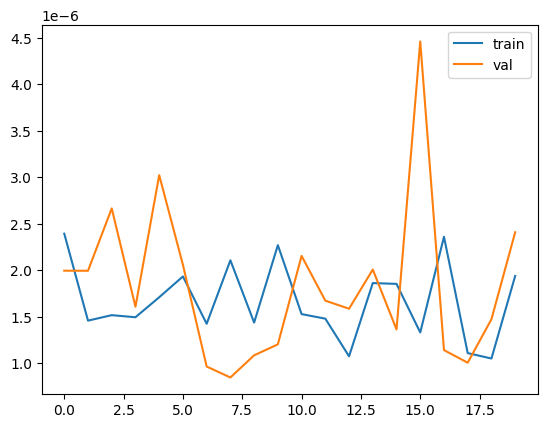

In [18]:
# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
ML_predictions = model.predict(test_x)
print(ML_predictions.shape)

In [ ]:
a = 0
b = 2
for i in range(100,110,1):
    plt.scatter(ML_predictions[i,a], ML_predictions[i,b], label = 'ML_prediction', s=12, marker ='x', color = 'b')
    # plt.plot(test_x[i,:,0], test_x[i,:,1], label = 'data', color = 'g')
    plt.scatter(test_answer[i,a], test_answer[i,b], label = 'answer', s=5, color = 'r')
    plt.scatter(test_prediction[i,a], test_prediction[i,b], label = 'prediction', s=10, color = 'y', marker ='o')
    plt.legend()
    plt.show()

Save!

In [ ]:
model.save(f'saved_models/ML_only_1_data_{name}.keras')